# Examples for the detection API

## Creating official darknet YOLOv2 pretrained model

`darknet` is the original author of YOLOv2 architecture, and has released several weights on this website : https://pjreddie.com/darknet/yolov2/. You can download some of them and use them !

Note that the default version takes a 416x416 input image, so make sure to take the right weights, or adapt the model architecture to support the one you want. You can find links to weights for `COCO` and `Pascal VOC` pretrained models in the `README` file. Download weights and put them in the current directory. The `from_darknet_pretrained` method automatically downloads the weights for the `COCO` pretrained model if the `weight_path` (1st argument) endswith `yolov2.weights` ! So you can simply execute the below cell and it will download + build the model.

Note : The `Pascal VOC` pretrained model seems to not work properly. However it is not a problem, as the `COCO` pretrained is trained on 80 classes which contains the 20 from `VOC`. You can simply use the `COCO` pretrained !

In [1]:
from models.detection.yolo import YOLO, COCO_CONFIG, VOC_CONFIG

coco_model = YOLO.from_darknet_pretrained('yolov2.weights', nom = 'yolo_coco', ** COCO_CONFIG)
print(coco_model)
#voc_model  = YOLO.build_from_darknet('yolov2-voc.weights', nom = 'yolo_voc', ** VOC_CONFIG)

100%|███████████████████████████████████████████████████████████████████████████████| 194M/194M [08:59<00:00, 378kiB/s]


Weight file pretrained_models/yolo_backend/full_yolo_backend.h5 does not exist !
Initializing model with kwargs : {'model': {'architecture_name': 'yolo', 'feature_extractor': <keras.engine.functional.Functional object at 0x000001A346303130>, 'input_shape': (416, 416, 3), 'nb_class': 80, 'nb_box': 5, 'flatten': True, 'randomize': True}}
Initializing submodel : `model` !
Submodel model saved in pretrained_models\yolo_coco\saving\model.json !
Model yolo_coco initialized successfully !
Submodel model saved in pretrained_models\yolo_coco\saving\model.json !

========== yolo_coco ==========
Sub model model
- Inputs 	: (None, 416, 416, 3)
- Outputs 	: (None, 13, 13, 5, 85)
- Number of layers 	: 76
- Number of parameters 	: 50.984 Millions
- Model not compiled

Transfer-learning from : yolov2.weights
Already trained on 0 epochs (0 steps)

- Image size : (416, 416, 3)
- Normalization style : None
- Labels (n = 80) : ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck',

## API demonstration

The API is quite easy to use : put the images you want to detect on (the filename(s)), the model you want to use (its name), and that's it !

Note that it also works on videos, where you can save the video with detection, or even frame by frame, or even extract only detected objects !

The streaming API achieves between 20 and 25 fps on my `RTX3080 Max-Q laptop GPU`, which is quite funny and impressive !

The `obj_threshold` argument represents the minimal score required to detect the object. The lower it is, the more object you will detect but with more mistakes (false positives).

In [2]:
from loggers import set_level
# If you want to log prediction's performances
set_level('time')

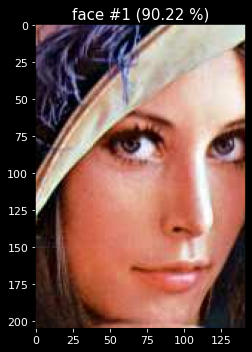

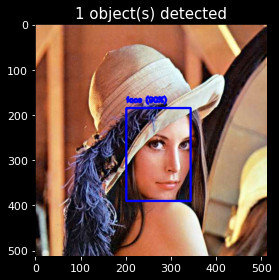

Timers for logger timer :
- predict : 726 ms
  - initialization : 0 μs
  - pre-processing : 0 μs
  - post_process executed 2 times : 569 ms (284 ms / exec)
    - show_result : 569 ms
      - load_image : 0 μs
  - batch processing : 0 μs
    - load_image executed 2 times : 0 μs (0 μs / exec)
  - inference : 157 ms
    - output decoding : 142 ms
      - output decoding : 142 ms
        - init : 142 ms
        - preprocess : 0 μs
        - box filtering : 0 μs
        - NMS : 0 μs
  - post processing : 0 μs
    - drawing boxes : 0 μs
      - drawing : 0 μs


In [3]:
from models.detection import detect

_ = detect('lena.jpg', save = False, model = 'yolo_faces', verbose = 2, obj_threshold = 0.5, color = 'b')

In [7]:
from models.detection import stream

stream(model = 'yolo_faces', max_time = 15)

Streaming processed 428 frames in 15.645 sec (27.36 fps)
Timers for logger timer :
- Timers in thread MainThread-12264 :
  - stream : 18.033 sec
    - inference : 0 μs
    - stream_camera : 18.033 sec
      - frame_generator : 0 μs
- Timers in thread frame_generator-2396 :
  - frame generation executed 428 times : 15.032 sec (35 ms / exec)
- Timers in thread frame transform-4284 :
  - predict executed 428 times : 14.486 sec (33 ms / exec)
    - initialization executed 428 times : 52 ms (0 ms / exec)
    - pre-processing executed 428 times : 3.953 sec (9 ms / exec)
      - load_image executed 856 times : 3.835 sec (4 ms / exec)
      - post_process executed 428 times : 0 ms (2 μs / exec)
    - inference executed 428 times : 10.019 sec (23 ms / exec)
      - output decoding executed 428 times : 6.863 sec (16 ms / exec)
        - output decoding executed 428 times : 6.551 sec (15 ms / exec)
          - init executed 428 times : 6.276 sec (14 ms / exec)
          - preprocess executed 428 

## Text detection with EAST

The weights for EAST are not downloaded automatically so make sure to check the `example_east` notebook to initialize it properly. After the model is created, you can use it the same way as YOLOv2 !

Note : currently, the *score* and *label* is not properly supported for rotated bounding boxes. It is the reason why all labels are `None` and scores are `100%`. The `show_text = False` argument aims to remove this useless information from the result image. This will be solved in future version ;)

Note 2 : the image comes from the `COCO val2017` folder.

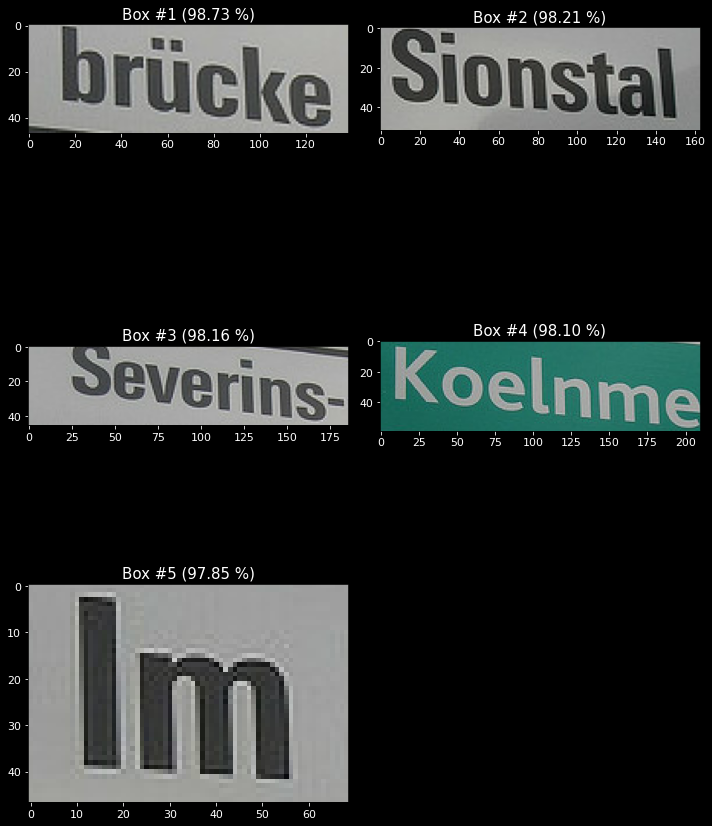

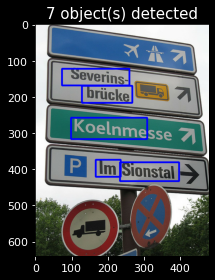

Timers for logger timer :
- predict : 1.564 sec
  - initialization : 0 μs
  - pre-processing : 0 μs
  - post_process executed 2 times : 1.175 sec (587 ms / exec)
    - show_result : 1.175 sec
      - load_image : 31 ms
  - batch processing : 15 ms
    - load_image executed 2 times : 15 ms (7 ms / exec)
  - inference : 357 ms
    - decode_output : 341 ms
      - bbox_iou : 18 ms
  - post processing : 15 ms
    - drawing boxes : 15 ms
      - drawing : 15 ms


In [5]:
from models.detection import detect

_ = detect('text.jpg', save = False, model = 'east_text', verbose = 2, obj_threshold = 0.5, color = 'b', show_text = False)

## Test pretrained YOLOv2 model on its dataset

For this test, you need the `COCO` / `VOC` dataset installed. It is just an example, you do not have to reproduce it ;)

Note : the `VOC` dataset is used because it is faster to load and contains a subset of `COCO`'s classes.

Loading dataset voc...
Timers for logger timer :
- dataset loading : 3.212 sec
  - VOC loading : 3.212 sec
8 boxes found :
0.5385 0.0470 0.1387 0.1395 4 0.7897
0.5897 0.1842 0.1624 0.1178 4 0.7973
0.4181 0.2762 0.1756 0.1459 4 0.8364
0.6649 0.2770 0.1876 0.1480 4 0.7018
0.4827 0.4127 0.1864 0.1247 4 0.8295
0.5025 0.5572 0.1939 0.1405 4 0.7283
0.3166 0.6575 0.1944 0.1650 4 0.8522
0.3474 0.8070 0.1939 0.1482 4 0.8070


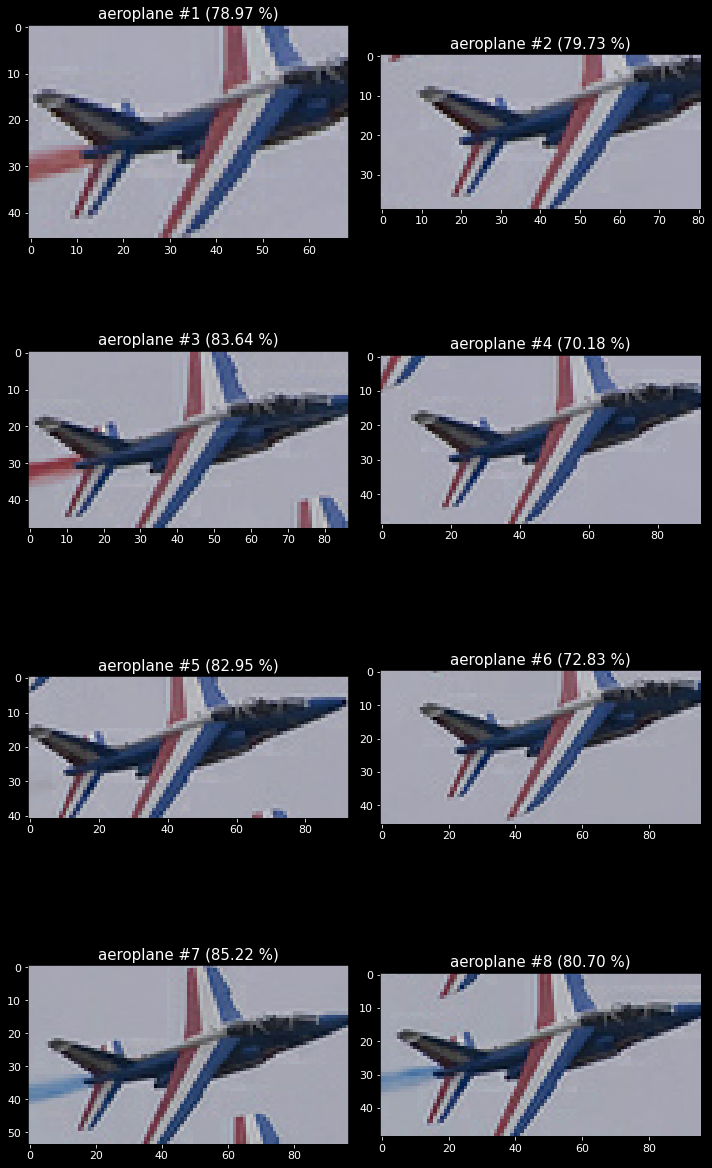

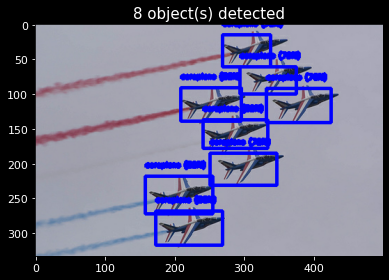

1 boxes found :
0.1069 0.2296 0.8217 0.3809 8 0.7859


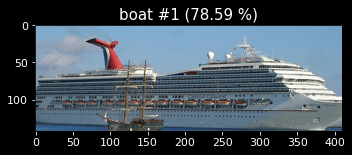

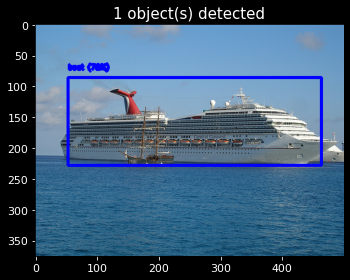

4 boxes found :
0.4224 0.0583 0.2229 0.7348 0 0.6359
0.1213 0.5919 0.0228 0.1351 27 0.5628
0.0157 0.4271 0.2179 0.4519 0 0.6876
0.1329 0.2906 0.7364 0.7075 17 0.6298


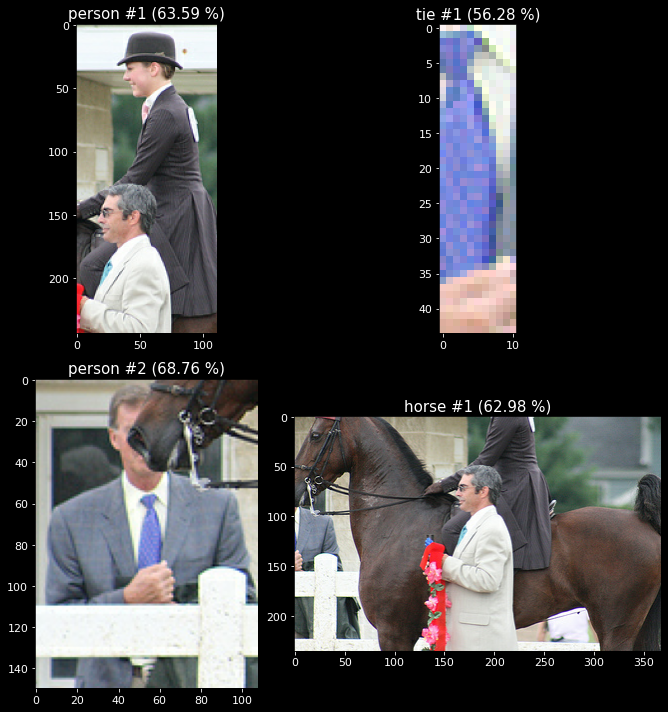

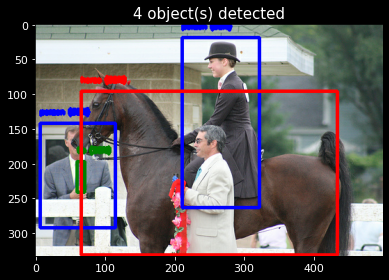

2 boxes found :
0.1005 0.3532 0.4531 0.6366 13 0.5154
0.4580 0.4902 0.2204 0.4870 0 0.7446


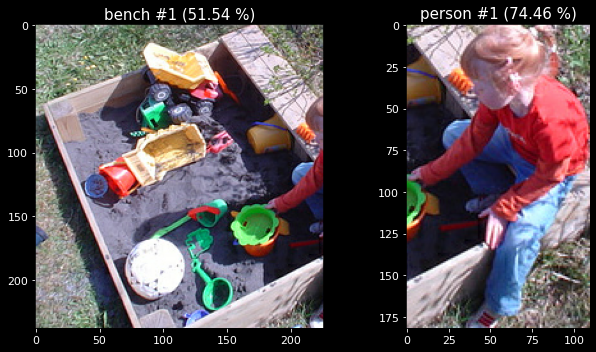

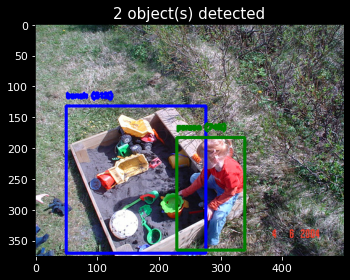

2 boxes found :
0.2541 0.1250 0.0989 0.2952 0 0.4985
0.1821 0.1453 0.1867 0.7561 0 0.7844


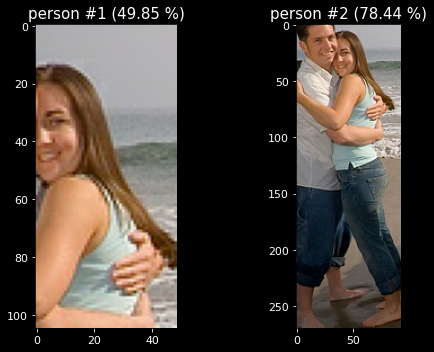

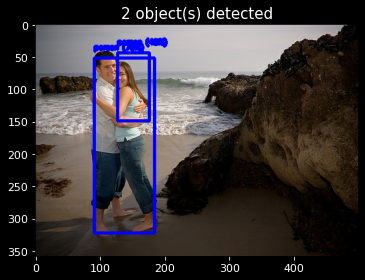

Timers for logger timer :
- predict : 4.224 sec
  - initialization : 0 μs
  - pre-processing : 0 μs
  - post_process executed 2 times : 3.878 sec (1.939 sec / exec)
    - show_result executed 5 times : 3.878 sec (775 ms / exec)
      - load_image executed 5 times : 12 ms (2 ms / exec)
  - batch processing : 61 ms
    - load_image executed 10 times : 60 ms (6 ms / exec)
  - inference : 285 ms
    - output decoding : 281 ms
      - output decoding executed 5 times : 280 ms (56 ms / exec)
        - init executed 5 times : 262 ms (52 ms / exec)
        - preprocess executed 5 times : 0 μs (0 μs / exec)
        - box filtering executed 5 times : 0 μs (0 μs / exec)
        - NMS executed 5 times : 18 ms (3 ms / exec)
  - post processing executed 5 times : 0 μs (0 μs / exec)
    - drawing boxes executed 5 times : 0 μs (0 μs / exec)
      - drawing executed 5 times : 0 μs (0 μs / exec)


In [7]:
from datasets import get_dataset
from models.detection import detect

#coco = get_dataset('coco')
voc = get_dataset('voc')

_ = detect(voc.sample(5, random_state = 0), model = 'yolo_coco', save = False, verbose = 3)